# Project: Wrangling and Analyze Data

## Data Gathering

To gather all three set of data for the project and loading them in the notebook


In [1]:
#import the libraries needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import json
import os
import re
import os
from functools import reduce
from io import StringIO

In [2]:
#Directly downloading the 'WeRateDogs' Twitter data (twitter_archive_enhanced.csv)
#Reading the first CSV file
##Use the read function to upload the csv file
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_1.shape

(2356, 17)

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
df_1.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
#To save the second TSV file from the url, make directory to store the file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
#Using the request funtion to get file and acertain request succeed
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response

<Response [200]>

In [8]:
#To save the file in the folder
with open(os.path.join(folder_name,url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [9]:
# converting the response to string
result = str(response.content, 'UTF-8')
image_prediction_data = StringIO(result)

In [10]:
# load tsv data to dataframe
df_2 = pd.read_csv(image_prediction_data, sep = '\t')

In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_2.shape

(2075, 12)

In [13]:
df_2.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
# To query the url using the request funtion for the Json text file
url_json = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url_json)
response

<Response [200]>

In [15]:
# Make directory to store the json file
folder_name = 'jsonfolder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [16]:
# write the json text file in the directory created above
with open(os.path.join('jsonfolder', url_json.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [19]:
# To access the third file
# asssign the tweet_id to dataframe1 tweet_id
tweet_ids = list(df_1['tweet_id'])

In [20]:
# Load json data from the directory
# append the data to empty list
json_data = []
with open (r'C:\Users\User\Documents\ALX-T DATA\Project 2\jsonfolder\tweet-json.txt') as jsonfile:
    for line in jsonfile:
        json_data.append(json.loads(line))

In [21]:
# To create an empty list to hold the tweets and append the extracted tweets to the list
tweetdata = []
for i in range(len(json_data)):
    tweet_id = json_data[i]['id']
    favorite_count = json_data[i]['favorite_count']
    retweet_count = json_data[i]['retweet_count']
    tweetdata.append({'tweet_id': tweet_id,
                       'favorite_count': favorite_count,
                       'retweet_count': retweet_count })

In [22]:
#Reading Json (the third file) file into python
df_3 = pd.DataFrame(tweetdata, columns=['tweet_id', 'favorite_count', 'retweet_count'])
df_3.shape

(2354, 3)

In [23]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment and programmatic assessement to assess the data.

In [31]:
# Quality issue from first Dataframe 'df_1'
#From df_1, the following Quality issues was oberved and recorded below;
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [32]:
df_1['name'] 

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [33]:
# access the rows of dog without an assigned name 
dogs_without_name = df_1.query('name == "None"')
print('This are the dogs without an assigned name.')
dogs_without_name

This are the dogs without an assigned name.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [34]:
# To determine each value count of floofer dog in the dataset
df_1.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [35]:
# To determine each value count of doggo dog in the dataset
df_1.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [36]:
# To determine each value count of pupper dog in the dataset
df_1.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [37]:
# To determine each value count of puppo dog in the dataset
df_1.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [38]:
# To access the row in name column starting with 'a' 
df_1[df_1.name.str.startswith(r'a')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [39]:
# To access the row in name column starting with 't' 
df_1[df_1.name.str.startswith(r't')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


In [40]:
# To know the value count of source of tweet column
df_1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [41]:
# To access sum of null values in expanded_urls column
sum_of_null_expanded_url = df_1.expanded_urls.isnull().sum()
print('The total sum of null values in expanded_urls column is {}'.format(sum_of_null_expanded_url))

The total sum of null values in expanded_urls column is 59


In [42]:
#To check for duplicated rows
df_1.duplicated().sum()

0

In [43]:
# Quality issue from Second Image prediction Dataframe 'df_2'
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [45]:
#To check for duplicated rows
df_2.duplicated().sum()

0

In [46]:
# To access value counts of the boolean whether or not the first prediction 'p1_dog' is a breed of dog
df_2.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [47]:
# To access value counts of the boolean whether or not the first prediction 'p2_dog' is a breed of dog
df_2.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [48]:
# To access value counts of the boolean whether or not the first prediction 'p3_dog' is a breed of dog
df_2.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [49]:
# Quality issue from Second Json file Dataframe 'df_3'
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [50]:
# To access unique value of each column of json dataframe
df_1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [51]:
#To check for duplicated rows
df_3.duplicated().sum()

0

# Quality issues

### 1. The name column have names that are not complete as shown above, it is seen that some have a single letter like 'a', 't' and 'none' etc. 

### 2. The values in column named 'source' in the dataframe df_1 should explicitly state the name of the platform the tweet was sent from, this would be replaced from html tag to the source name. 

### 3. Five Columns in df_1 have null values.  This will affect the result and would be dropped.  The columns affected include:  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,  retweeted_status_timestamp. 

### 4. The titles of the colums(column label) does not give a clear picture of what the column  indicates as seen in df_2. i.e p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, and p3_dog column labels

### 5.  There should be a change in the tweet_id data type from an object data type to a string data type in all the dataframes, the timestamp column in the twitter archive dataframe should be converted from an object data type to a datetime, and the objects source, tweet, and name in the archive dataframe should be converted to strings from object data types.

### 6. There are data that are not consistent with the dataset for he three data and will be dropped i.e  rating_denominator and rating_numerator columns

### 7. We will exclude retweets from the ratings, as well as expanded_urls, since it won't be necessary for our analysis from the first dataframe df_1

### 8. There would be a change from an object to a categorical variable in the prediction 1, 2 and 3 columns.The img_num column in the image prediction dataframe image number that corresponded to the most confident prediction  this would be converted from int to categorical variable.

# Tidiness issues

### 1. There are multiple dog stages columns present i.e. doggo, floofer, pupper and puppo. each observation should form a row, merging the columns to a single dog stage column would solve the issue to meet the rule of tidiness

### 2.To simplify the dataset, all three datasets will be merged into one table, as they have similar columns.

## Cleaning

In [52]:
# Making a copy of the dataframe into a new dataframe
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

#### Define

- To drop the column that will not be included in the analysis which are the retweets and the replys

#### Code

In [53]:
# To drop the columns that is not relevant with the analysis
df_1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

#### Test

In [54]:
# To view the new column after the dropped columns
df_1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Define

- To separate the text column into different colmn, the first step is to chmge the colum to string and split the text column into new columns containing ratings, tweet's link, and tweet content.

#### Code

In [55]:
# To convert the column to string
df_1_clean['text'] = df_1_clean['text'].astype('string')

In [56]:
# To assign new column, create a new column with extracted tweet_link of text column. 
df_1_clean['tweet_link'] = df_1_clean['text'].str.extract('(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)')
df_1_clean['ratings'] = df_1_clean['text'].str.extract("((\d*?)[-]*(\d+)\s*/\s*(\d+))").iloc[:, 0]

In [57]:
#To split the column, Lamda function is adopted. 
df_1_clean["tweet"]  = df_1_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

# lambda func on the text column to split fraction off
df_1_clean["tweet"]  = df_1_clean['text'].apply(lambda x: re.split('((\d*?)[-]*(\d+)\s*/\s*(\d+))', str(x))[0])

# To drop the text column, use the srop funtion. 
df_1_clean.drop('text', axis = 1, inplace = True)

#### Test

In [58]:
# To check the dataframe
df_1_clean.head()

,tweet_id,timestamp,source,name,doggo,floofer,pupper,puppo,tweet_link,ratings,tweet
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Phineas,None,None,None,None,https://t.co/MgUWQ76dJU,13/10,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Tilly,None,None,None,None,https://t.co/0Xxu71qeIV,13/10,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Archie,None,None,None,None,https://t.co/wUnZnhtVJB,12/10,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Darla,None,None,None,None,https://t.co/tD36da7qLQ,13/10,This is Darla. She commenced a snooze mid meal.
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Franklin,None,None,None,None,https://t.co/AtUZn91f7f,12/10,This is Franklin. He would like you to stop ca...


#### Define

- To clearly define the platform used for the tweets, this is done using map funtion. 

#### code

In [59]:
#To first evaluate the column that is been replaced, value count is used to understand the grouping
df_1_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [60]:
#Using Map funtion on the column
df_1_clean.source = df_1_clean.source.map({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iphone', '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine', '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client', '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'})

#### Test

In [61]:
# To check for the replaced values
df_1_clean.source.value_counts()

Twitter for iphone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

In [62]:
df_1_clean.head()

,tweet_id,timestamp,source,name,doggo,floofer,pupper,puppo,tweet_link,ratings,tweet
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iphone,Phineas,None,None,None,None,https://t.co/MgUWQ76dJU,13/10,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iphone,Tilly,None,None,None,None,https://t.co/0Xxu71qeIV,13/10,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iphone,Archie,None,None,None,None,https://t.co/wUnZnhtVJB,12/10,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iphone,Darla,None,None,None,None,https://t.co/tD36da7qLQ,13/10,This is Darla. She commenced a snooze mid meal.
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iphone,Franklin,None,None,None,None,https://t.co/AtUZn91f7f,12/10,This is Franklin. He would like you to stop ca...


#### Define

- Replace the none value of the the doggo, floofer, pupper and puppo column with NaN 

#### code

In [63]:
# a func to replace None with np.nan
# in doggo, floofer, pupper and puppo columns
def replace_value(column):
    """replace None values with Unidentified"""
    """param: column"""
    """return replaced value"""
    replaced_value = column.replace([None], np.nan, inplace=True)
    return replaced_value

In [64]:
# calling the func and passing doggo, floofer, pupper and puppo column as argument
replace_value(df_1_clean.doggo)
replace_value(df_1_clean.floofer)
replace_value(df_1_clean.pupper)
replace_value(df_1_clean.puppo)

#### Test

In [65]:
# To access the replaced value
df_1_clean.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [66]:
df_1_clean.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [67]:
df_1_clean.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [68]:
df_1_clean.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### Define

- Also in order to clean the dataset, there is a need to clarify the meaning of some variables. For example, in df_1, the none variable does not signify the name of a dog and hence will need to be replaced with null. 

#### Code

In [69]:
# To firstly verify the value counts of each name 
df_1_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [70]:
# replace the None name with null
df_1_clean.name.replace({'None': 'null'}, inplace = True)

### Test

In [71]:
# To confirm the value counts of each name 
df_1_clean.name.value_counts()

null          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

#### Define
Convert the doggo, floofer, pupper and puppo columns in the dataframe to categorical variable

#### Code

In [72]:
# check the data type
df_1_clean.doggo.dtype

dtype('O')

In [73]:
# check the data type
df_1_clean.floofer.dtype

dtype('O')

In [74]:
# check the data type
df_1_clean.pupper.dtype

dtype('O')

In [75]:
# check the data type
df_1_clean.puppo.dtype

dtype('O')

In [76]:
# converting to qualitative variable
df_1_clean.doggo = df_1_clean.doggo.astype('category')
df_1_clean.floofer = df_1_clean.floofer.astype('category')
df_1_clean.pupper = df_1_clean.pupper.astype('category')
df_1_clean.puppo = df_1_clean.puppo.astype('category')

#### Test

In [77]:
# checking the data type
df_1_clean.doggo.dtype

CategoricalDtype(categories=['None', 'doggo'], ordered=False)

In [78]:
# checking the data type
df_1_clean.puppo.dtype

CategoricalDtype(categories=['None', 'puppo'], ordered=False)

#### Define
It would be better to replace the column label in the image prediction dataframe with the replacement column function to make the column label clearer and easier to understand.

#### Code

In [79]:
# To rename the afffected column
df_2_clean.rename(columns = {'p1': 'prediction1', 'p2': 'prediction2', 'p3': 'prediction3', 'p1_conf': 'prediction1_conf', 'p2_conf': 'prediction2_conf', 'p3_conf': 'prediction3_conf', 'p1_dog': 'prediction1_a_dog', 'img_num': 'img_number', 'p2_dog': 'prediction2_a_dog', 'p3_dog': 'prediction3_a_dog'}, inplace = True)

#### Test

In [80]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   int64  
 1   jpg_url            2075 non-null   object 
 2   img_number         2075 non-null   int64  
 3   prediction1        2075 non-null   object 
 4   prediction1_conf   2075 non-null   float64
 5   prediction1_a_dog  2075 non-null   bool   
 6   prediction2        2075 non-null   object 
 7   prediction2_conf   2075 non-null   float64
 8   prediction2_a_dog  2075 non-null   bool   
 9   prediction3        2075 non-null   object 
 10  prediction3_conf   2075 non-null   float64
 11  prediction3_a_dog  2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define

- In the twitter archive dataframe(df_1), combining dog stages into a single column, renaming combined values, and finally dropping the doggo, floofer, puppo, and puppa columns. Merging the columns to a single column would resolve this issue, since each observation should form a row.

#### Code

In [81]:
# concat the doggo dog stage to one column "dog_stage"
df_1_clean["dog_stage"] = df_1_clean['doggo'].astype(str) + "-" + df_1_clean["floofer"].astype(str) + "-" + df_1_clean["pupper"].astype(str) + "-" + df_1_clean["puppo"].astype(str)

In [82]:
# check the values of dog_stage column
df_1_clean.dog_stage.value_counts()

None-None-None-None        1976
None-None-pupper-None       245
doggo-None-None-None         83
None-None-None-puppo         29
doggo-None-pupper-None       12
None-floofer-None-None        9
doggo-None-None-puppo         1
doggo-floofer-None-None       1
Name: dog_stage, dtype: int64

In [83]:
# Rename values in dog_stage column
df_1_clean.dog_stage = df_1_clean.dog_stage.replace({'None-None-None-None':'Unidentified',
                                                             'None-None-pupper-None':'pupper', 
                                                             'doggo-None-None-None':'doggo',
                                                             'None-None-None-puppo':'puppo', 
                                                             'doggo-None-pupper-None':'doggo and pupper',
                                                             'None-floofer-None-None': 'floofer', 
                                                             'doggo-None-None-puppo':'doggo and puppo',
                                                             'doggo-floofer-None-None': 'doggo and floofer'})


In [84]:
# drop the four columns of dog stage
df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [85]:
# check the repalced value
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    2356 non-null   int64 
 1   timestamp   2356 non-null   object
 2   source      2356 non-null   object
 3   name        2356 non-null   object
 4   tweet_link  2239 non-null   object
 5   ratings     2356 non-null   string
 6   tweet       2356 non-null   object
 7   dog_stage   2356 non-null   object
dtypes: int64(1), object(6), string(1)
memory usage: 147.4+ KB


#### Define

- In the twitter archive dataframe, the column timestamp should be converted from object data type to datetime.

- The columns 'source', 'tweet', and 'name' should be converted from object data type to string.

#### Code

In [86]:
# check the data type
df_2_clean.tweet_id.dtype

dtype('int64')

In [87]:
# check the data type
df_3_clean.tweet_id.dtype

dtype('int64')

In [88]:
# check the data type
df_1_clean.tweet_id.dtype

dtype('int64')

In [89]:
# check the data type
df_1_clean.timestamp.dtype

dtype('O')

In [90]:
# check the data type
df_1_clean.tweet.dtype

dtype('O')

In [91]:
# convert the required column
# to each data type
df_2_clean['tweet_id'] = df_2_clean['tweet_id'].astype('string')
df_3_clean['tweet_id'] = df_3_clean['tweet_id'].astype('string')
df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype('string')
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])
df_1_clean['source'] = df_1_clean['source'].astype('string')
df_1_clean['tweet'] = df_1_clean['tweet'].astype('string')
df_1_clean['name'] = df_1_clean['name'].astype('string')

#### Test

In [92]:
# check the data type
df_2_clean.tweet_id.dtype

string[python]

In [93]:
# check the data type of timestamp
df_1_clean.timestamp.dtype

datetime64[ns, UTC]

#### Define

- To combine the three dataframe into one single data frame as these three dataset are part of the same observation.

#### Code

In [94]:
# Assigning the three dataframe a single dataframe
dfs = [df_1_clean, df_2_clean, df_3_clean]

#merge all DataFrames into one
twitter_archive_master = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'], how='inner'), dfs)

#### Test

In [95]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2073 non-null   string             
 1   timestamp          2073 non-null   datetime64[ns, UTC]
 2   source             2073 non-null   string             
 3   name               2073 non-null   string             
 4   tweet_link         2073 non-null   object             
 5   ratings            2073 non-null   string             
 6   tweet              2073 non-null   string             
 7   dog_stage          2073 non-null   object             
 8   jpg_url            2073 non-null   object             
 9   img_number         2073 non-null   int64              
 10  prediction1        2073 non-null   object             
 11  prediction1_conf   2073 non-null   float64            
 12  prediction1_a_dog  2073 non-null   bool         

In [96]:
twitter_archive_master.head()

,tweet_id,timestamp,source,name,tweet_link,ratings,tweet,dog_stage,jpg_url,img_number,...,prediction1_conf,prediction1_a_dog,prediction2,prediction2_conf,prediction2_a_dog,prediction3,prediction3_conf,prediction3_a_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iphone,Phineas,https://t.co/MgUWQ76dJU,13/10,This is Phineas. He's a mystical boy. Only eve...,Unidentified,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iphone,Tilly,https://t.co/0Xxu71qeIV,13/10,This is Tilly. She's just checking pup on you....,Unidentified,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iphone,Archie,https://t.co/wUnZnhtVJB,12/10,This is Archie. He is a rare Norwegian Pouncin...,Unidentified,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iphone,Darla,https://t.co/tD36da7qLQ,13/10,This is Darla. She commenced a snooze mid meal.,Unidentified,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iphone,Franklin,https://t.co/AtUZn91f7f,12/10,This is Franklin. He would like you to stop ca...,Unidentified,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


## Storing Data
To Save the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [97]:
# save as a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

- ### In this section visualization and analysis of the wrangled data would be carried out. 

In [98]:
# To visualize thenthe distribution of dog stage
# func to plot a countplot
def univariate_count_plot(x, title):
    """plot a countplot of one variable"""
    """param:x, title"""
    """return none"""
    fig = plt.figure(figsize=(8,6), dpi= 400)
    ax =sns.countplot(x = x , data =twitter_archive_master)
    for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0, p.get_height()+0.05))
    title = fig.suptitle(title)
    plt.xticks(rotation = 45)
    plt.plot()   
plt.show();

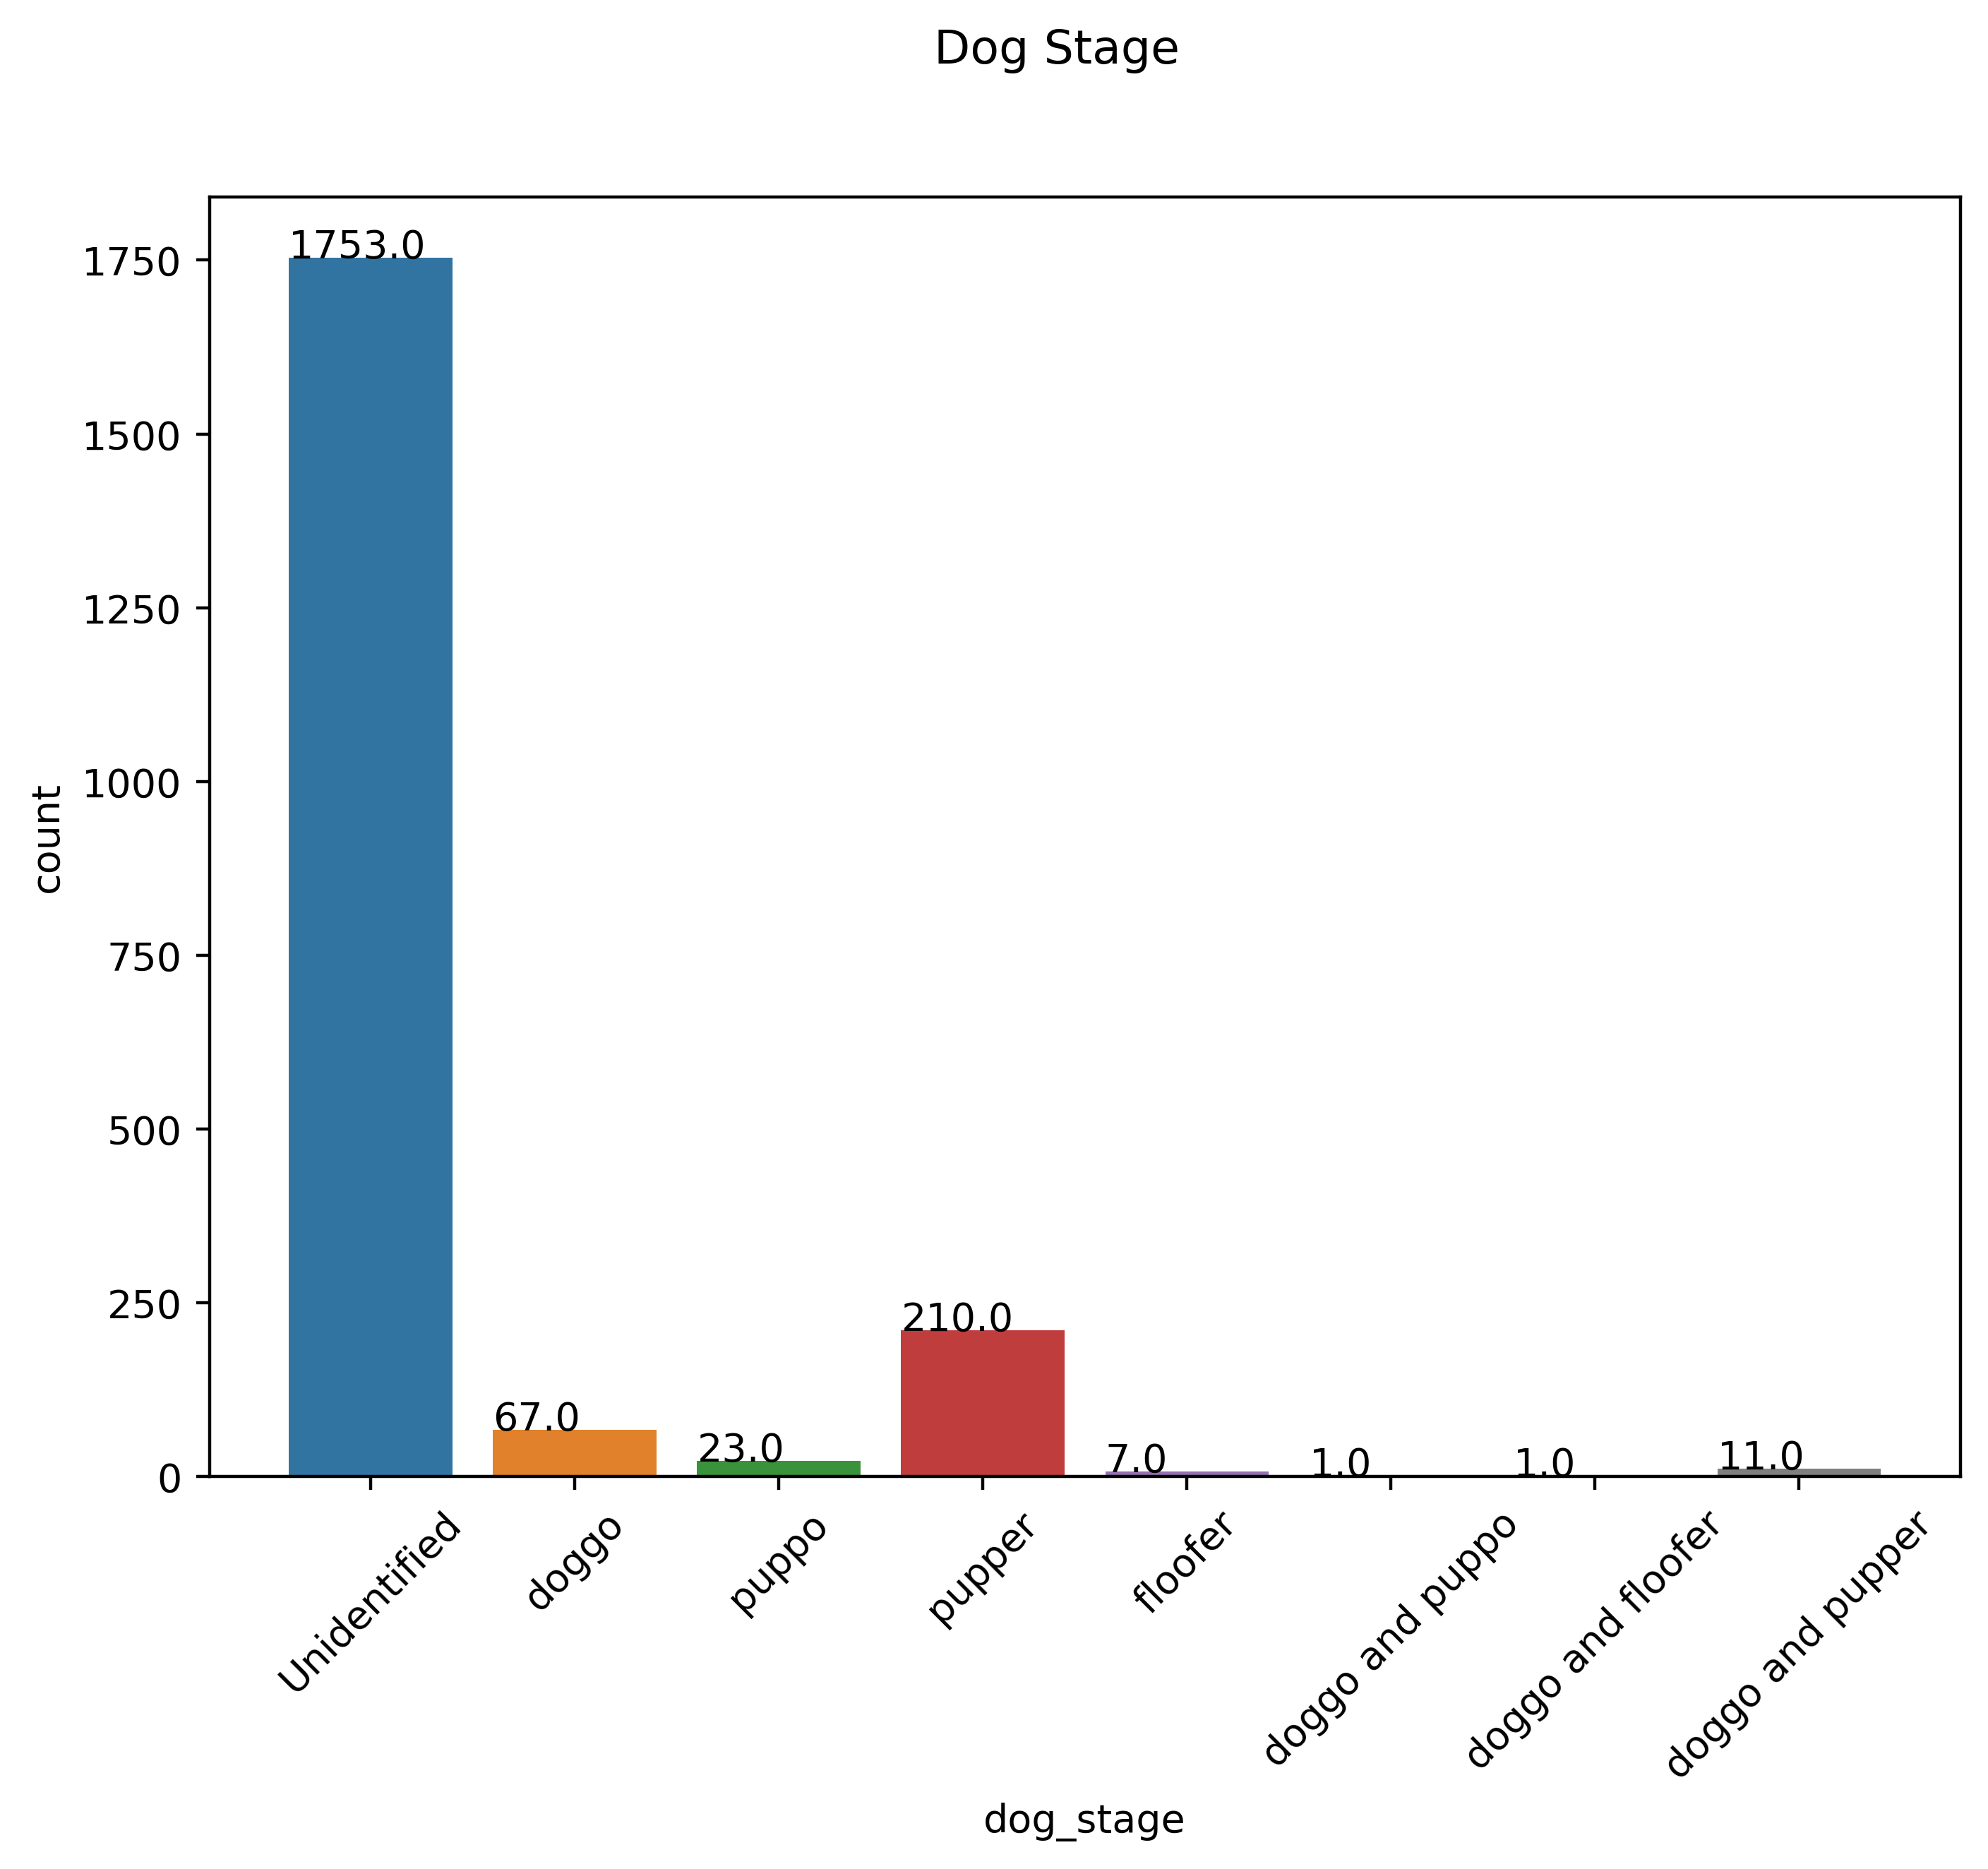

In [99]:
# calling the func to plot dog stage
univariate_count_plot('dog_stage', 'Dog Stage')

**Most of the observations in the Dog stage category have no dog stage attribute, so they have been classified as unidentified. Out of those that have dog stage attribute, floofer dog stage has the lowest occurence with 7, followed by puppo with 23.Pupper dog stage is ranked highest with 210, and doggo is ranked second with 67.**

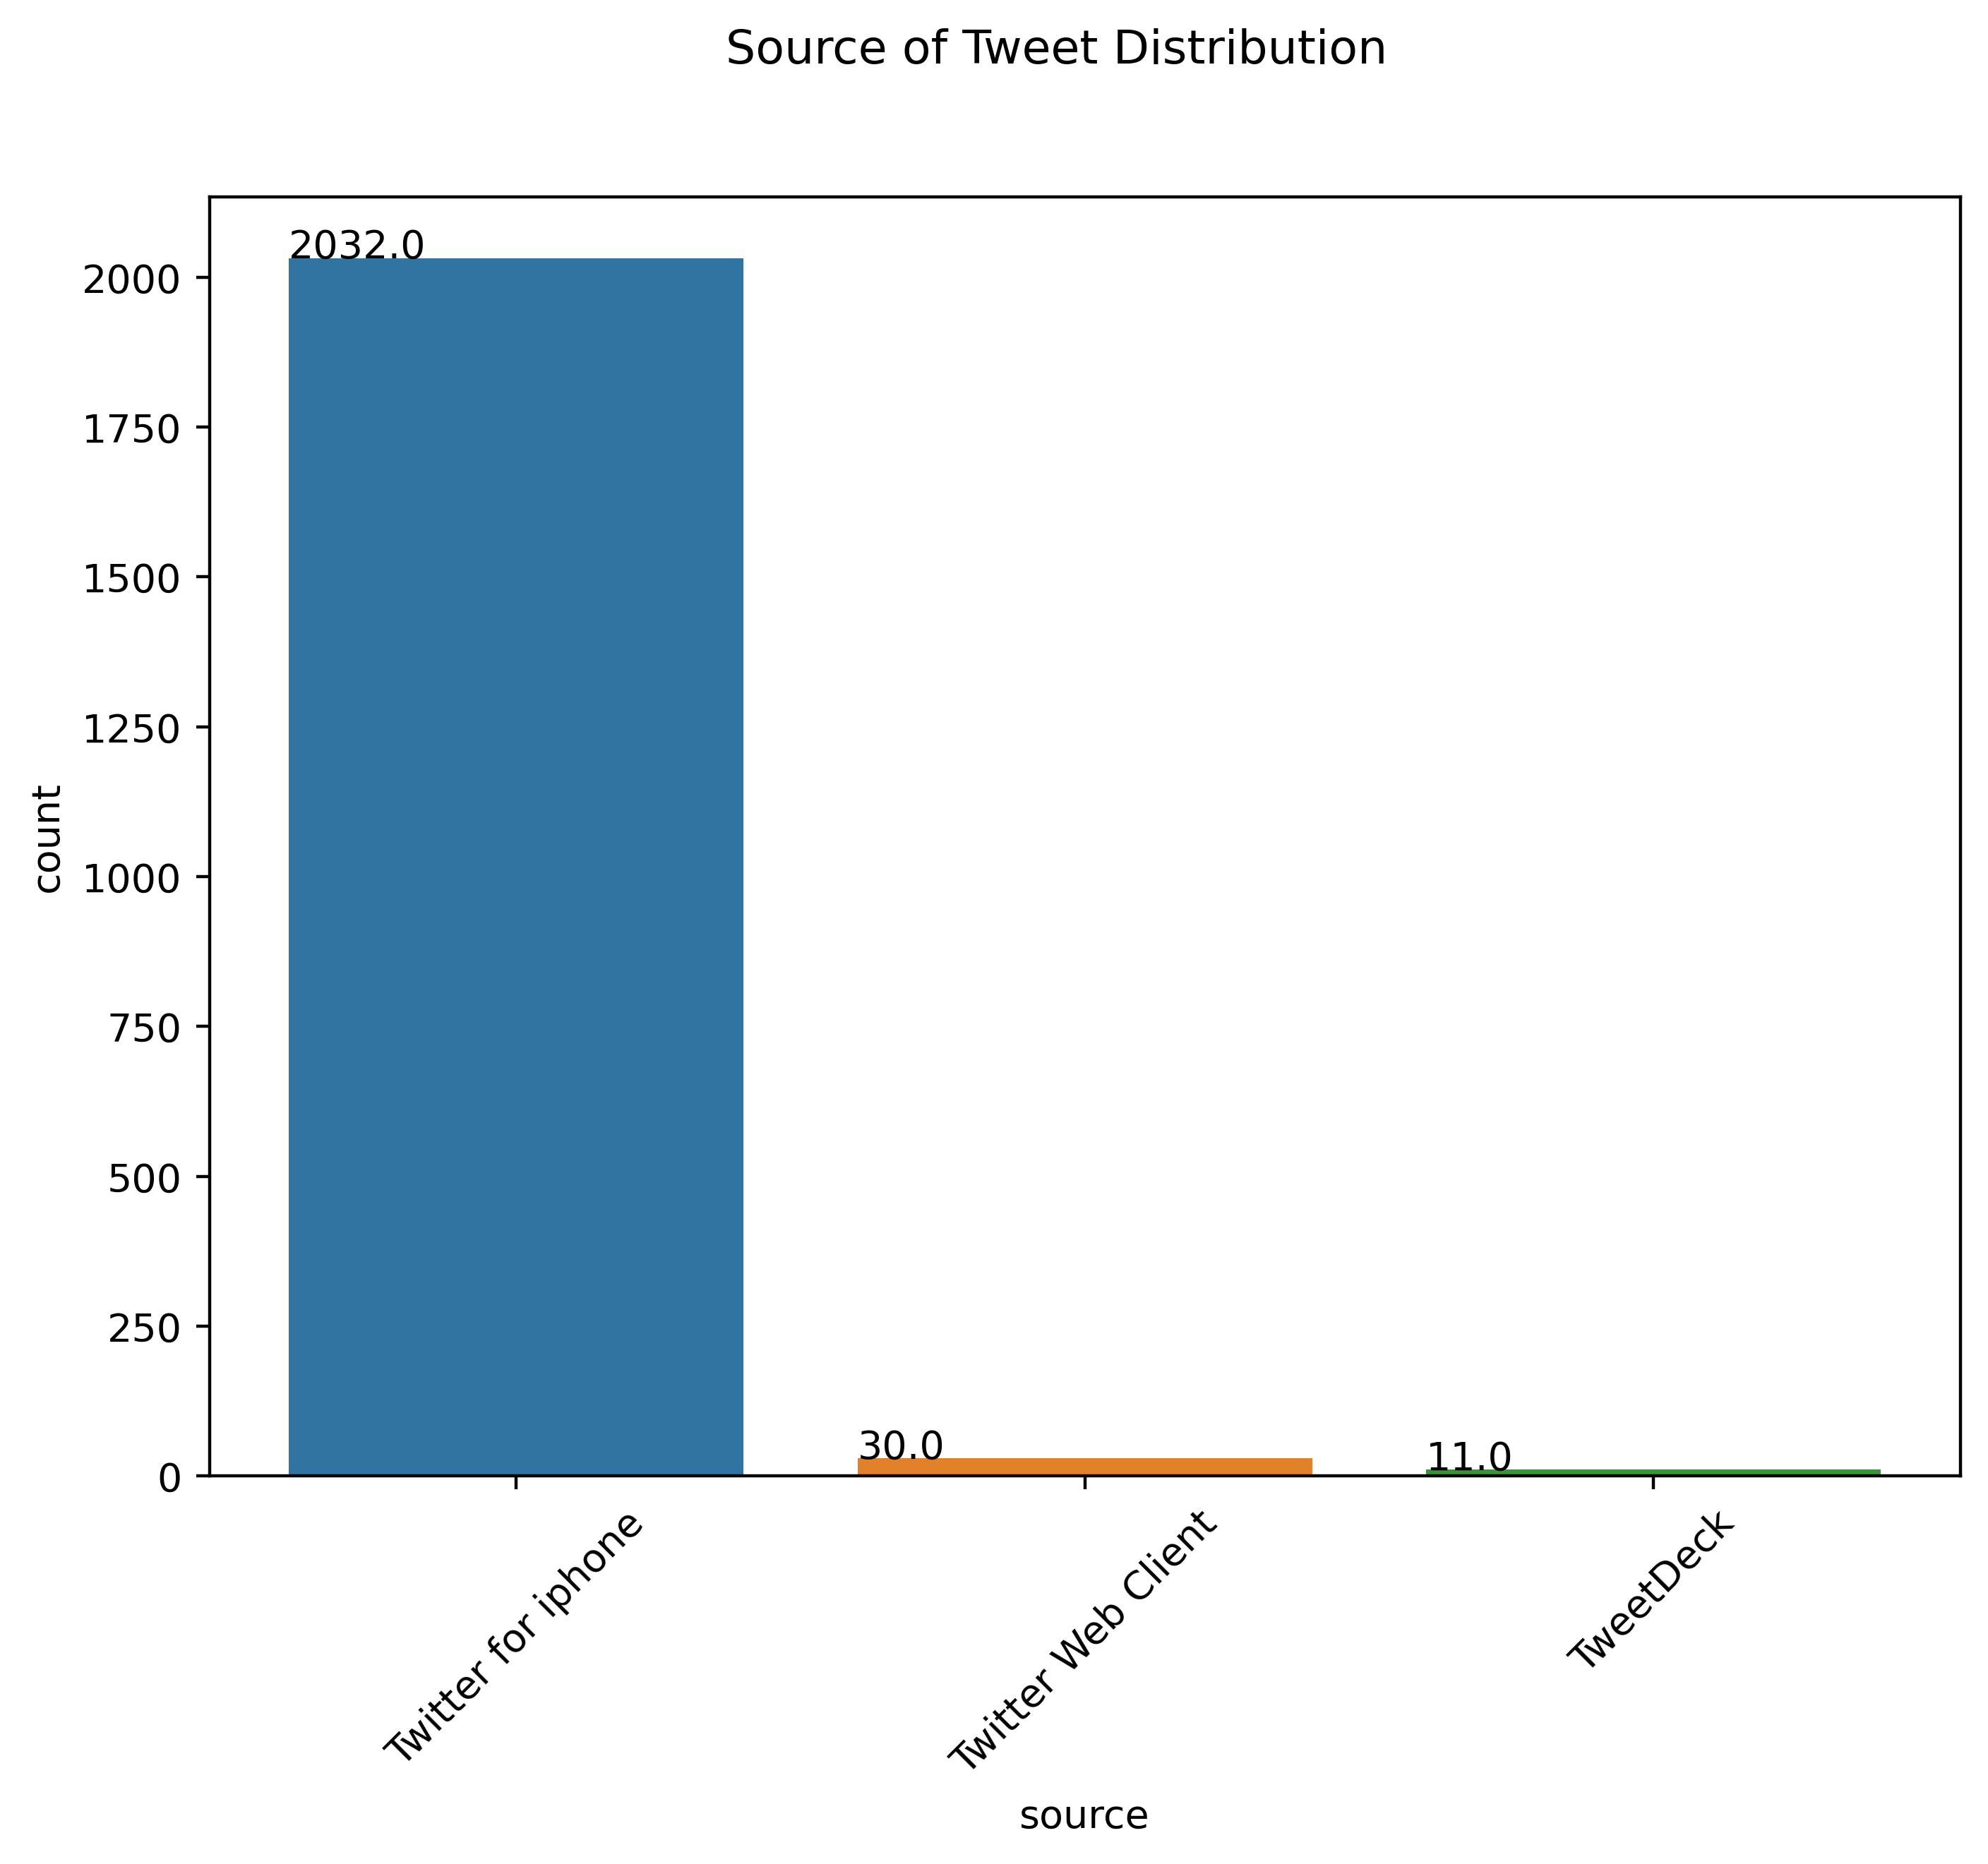

In [100]:
# To plot the frequency of tweet source
univariate_count_plot('source', 'Source of Tweet Distribution')

**According to the figure above, 1890 tweets were sent from Twitter for iPhone, representing 99% of the category of source of tweets.

Text(0.5, 1.0, 'The count of Tweet souruce per prediction1')

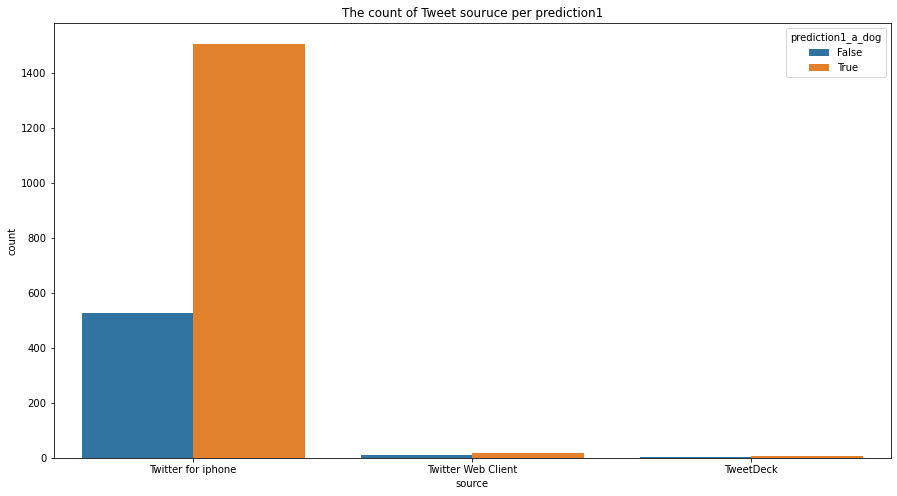

In [205]:
# To determine the ration of truth to false for each tweet source
plt.figure(figsize = (15,8))
sns.countplot(x='source',hue='prediction1_a_dog', data=twitter_archive_master).set_title('The count of Tweet souruce per prediction1')

**The above shows the disparity between the prediction of each of the tweet source. Though many tweet came off iphone, most of the predictions on were true as there is a huge difference between the true prediction and the false prediction, but the difference from other source are at pal. 

- #### Scatterplot showing the relationship between retweet counts and favorite counts categorized by prediction validity. To demonstrate the relationship between the retweet count (x-axis) and the favorite count (y-axis), the function below plots a scatterplot.

In [206]:
# The function to plot a scatter plot
def draw_scatter_plot(hue, title):
    """plot a scatter plot"""
    """param: hue, title"""
    """return none"""
    ax = plt.figure(figsize =(8,6), dpi =600)
    p=sns.scatterplot(x= 'retweet_count', y = 'favorite_count', data =  twitter_archive_master, hue = hue)
    p.set(title = title)
    p.set(xscale = 'log')
    p.set(yscale = 'log')
    plt.savefig("scatterplot.png", format="png")

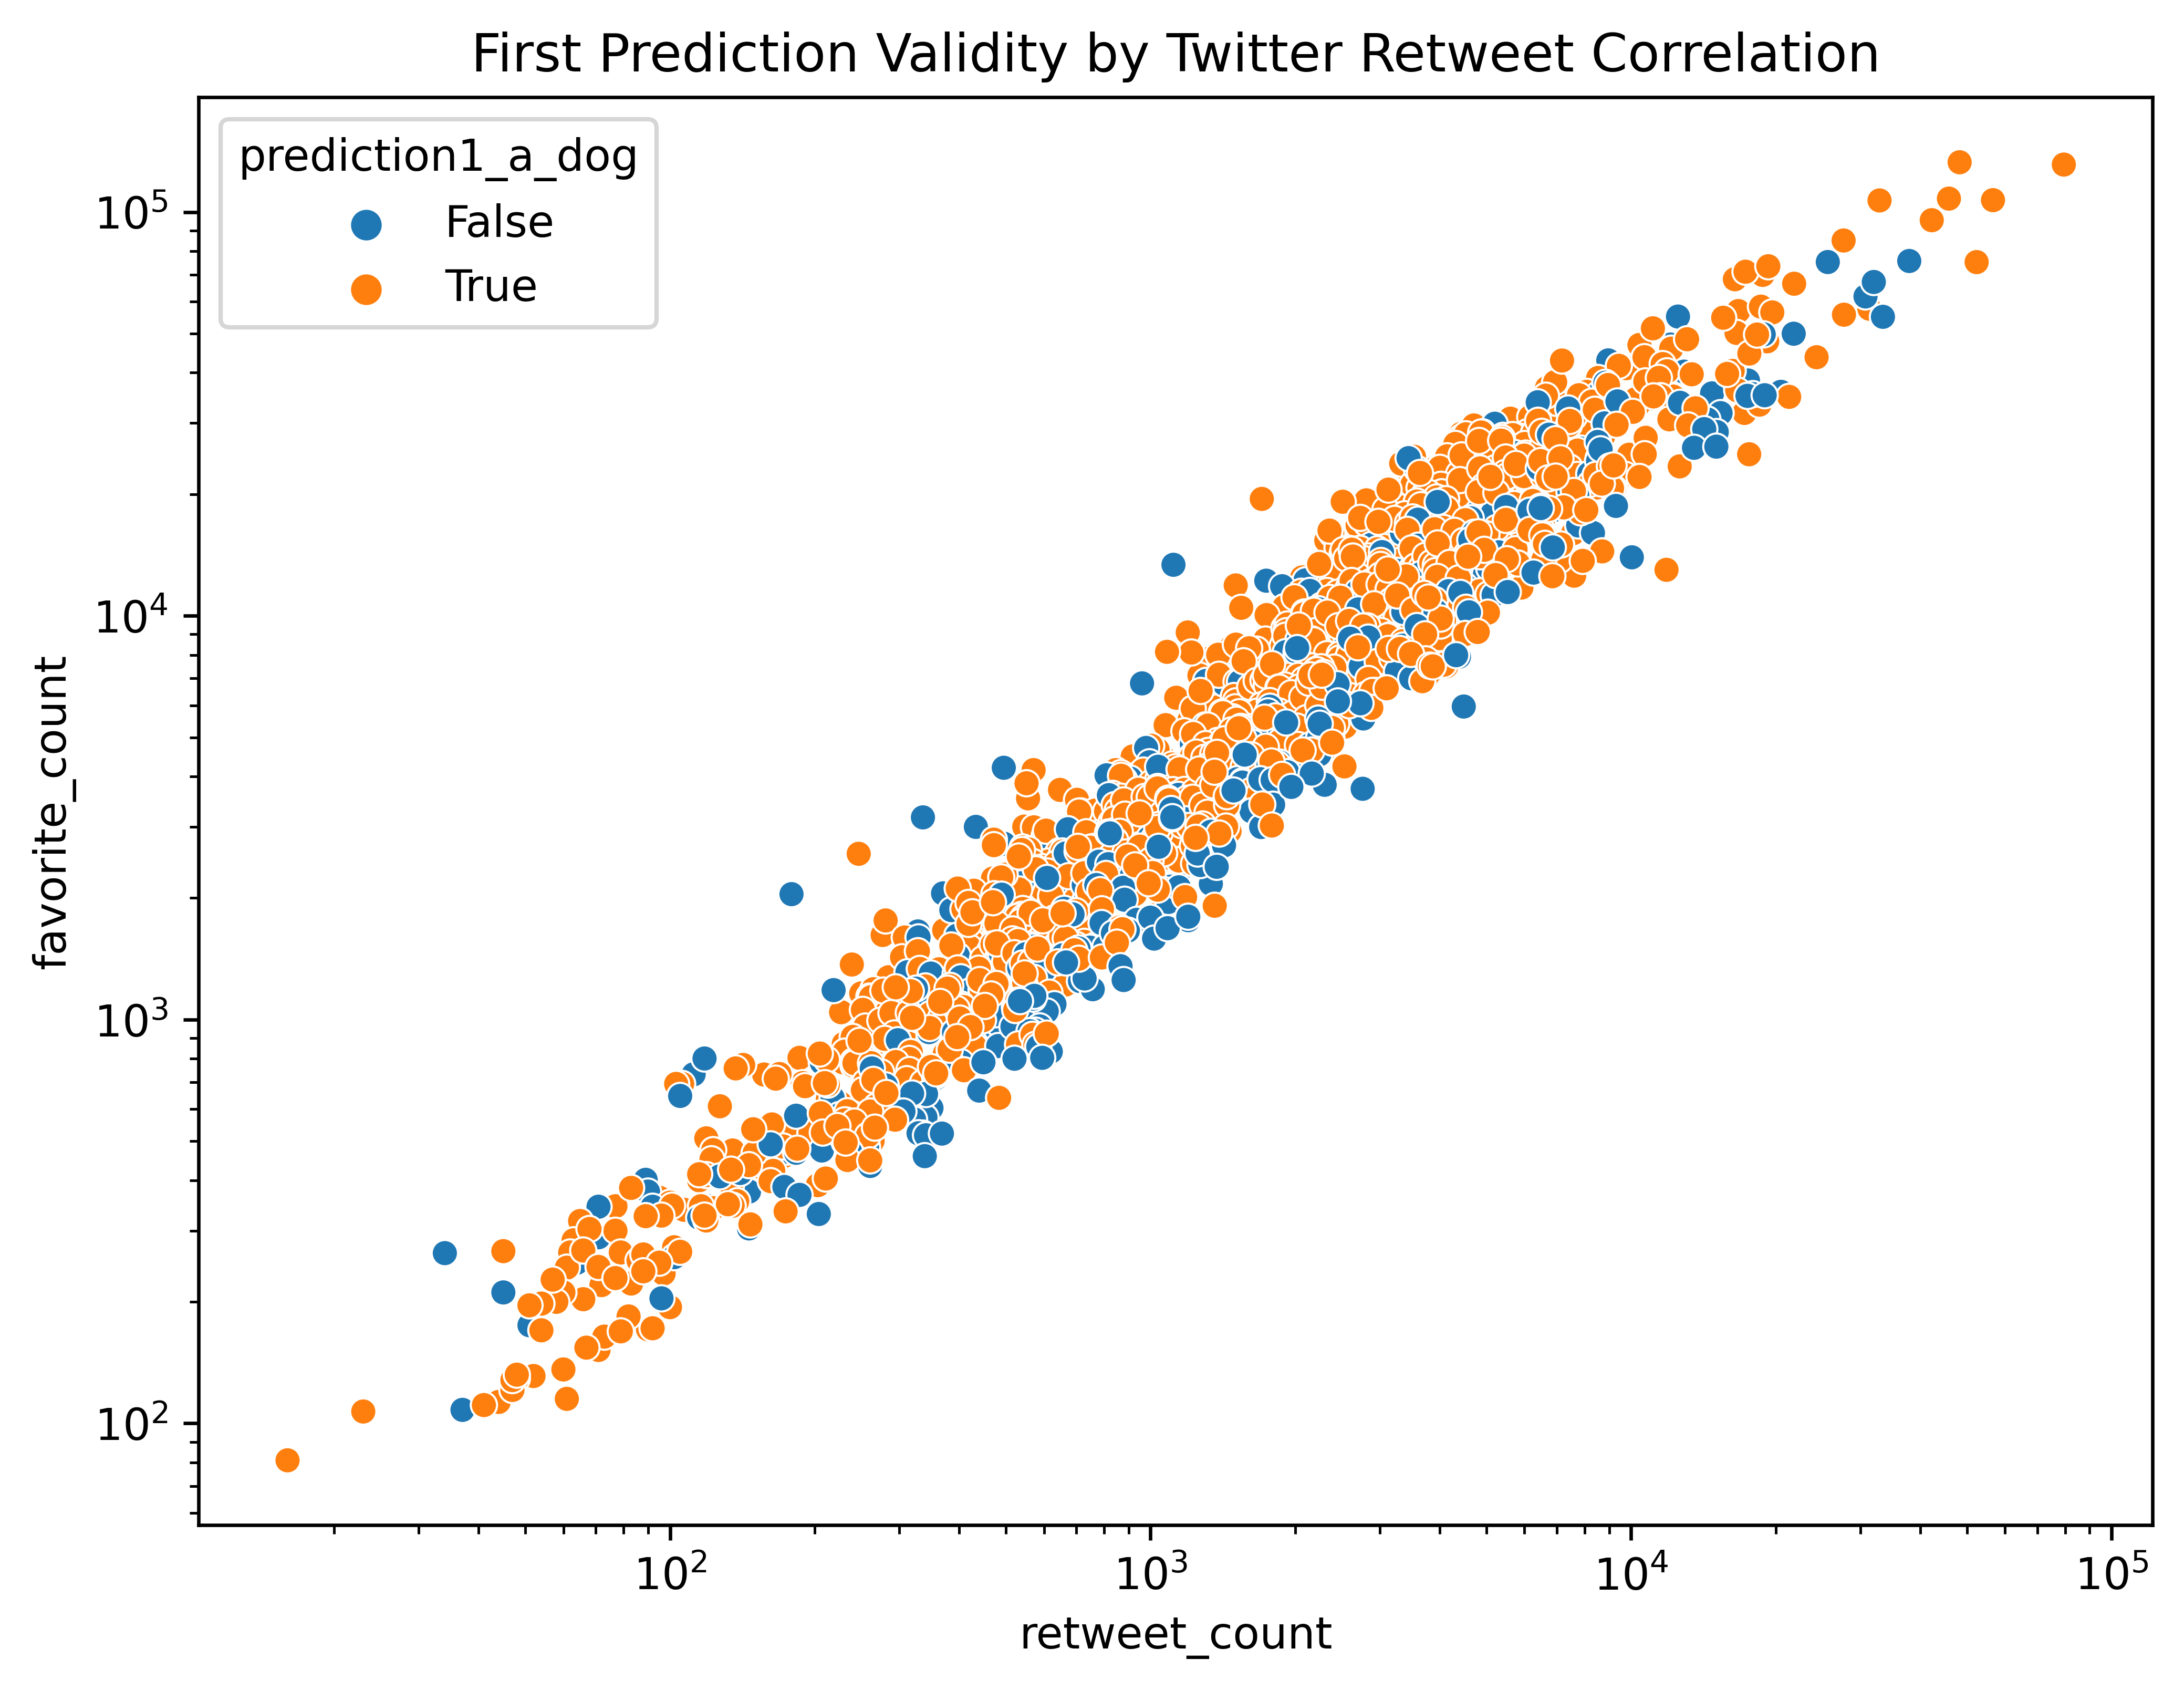

In [209]:
# calling the function to plot Correllation btw Retweet and favorite
draw_scatter_plot('prediction1_a_dog', 'First Prediction Validity by Twitter Retweet Correlation')

Since Prediction1 has better quality, there will be limit of analysis to prediction1. However, Retweet count and favorite count correlate positively, it seems logical that the more a tweet is retweeted, the more likelihood it has for gaining more followers for potential likes. Data points are categorical by the validity of the second prediction, the correct prediction is true and the incorrect prediction is false.